### Deaeration for Tanks 26 MT

In [2]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Supress Warnings
import warnings 
warnings.filterwarnings('ignore')
#The last line of code helps in suppressing the unnecessary warnings.
from scipy import stats
import seaborn as sns

In [3]:
# Set global font settings
plt.rc('axes', titlesize=16, titleweight='bold', labelsize=14, labelweight='bold')  # For axes title and labels
plt.rc('xtick', labelsize=12)  # For x-axis tick labels
plt.rc('ytick', labelsize=12)  # For y-axis tick labels

In [4]:
# Data Collection:
# Using the Specify Absolute Path: If the file is located in a different directory, you can specify the absolute path to the file when reading it using pd.read_csv():
import pandas as pd
file_path = r'C:\Users\User\Desktop\Thesis 2023\Capstone---CCT\Python Working Notebooks\ProductionDataupdated1.csv'
ProductionTank = pd.read_csv(file_path)

In [5]:
#ProductionTank

In [6]:
ProductionTank.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
import pandas as pd

Data = pd.DataFrame(ProductionTank)


In [8]:
Data.replace("STEP2_CONS", 
           "STEP2_CONS-Deaeration", 
           inplace=True)

In [9]:
print(Data[['Instruction_Step', 'Phase_start_delay']].isnull().sum())

Instruction_Step     25
Phase_start_delay     0
dtype: int64


In [10]:
filtered_data = Data[Data['Instruction_Step'] == 'STEP2_CONS-Deaeration']

#### Exploring the different deaeration times ( start Phase delay duration) for each of the groups of productions tanks and their common materials 

#### Deaeration in  Production Tanks : '2601','2603','2604'

In [11]:
tanks_in_group1 = [2601,2603,2604]
instruction_step_of_interest = 'STEP2_CONS-Deaeration'

In [12]:
filtered_data = Data[(Data['Tank_1'].isin(tanks_in_group1)) & 
                    (Data['Instruction_Step'] == instruction_step_of_interest)]

In [13]:
common_materials = filtered_data.groupby('Material').filter(lambda x: x['Tank_1'].nunique() == len(tanks_in_group1))['Material'].unique()

In [14]:
filtered_data1 = filtered_data[filtered_data['Material'].isin(common_materials)]
#filtered_data1

In [15]:
# Calculate total phase duration for each desired instruction step for each tank and material
total_durations = filtered_data.groupby(['Tank_1', 'BATCHID','Instruction_Step'])['Phase_duration'].sum().reset_index()

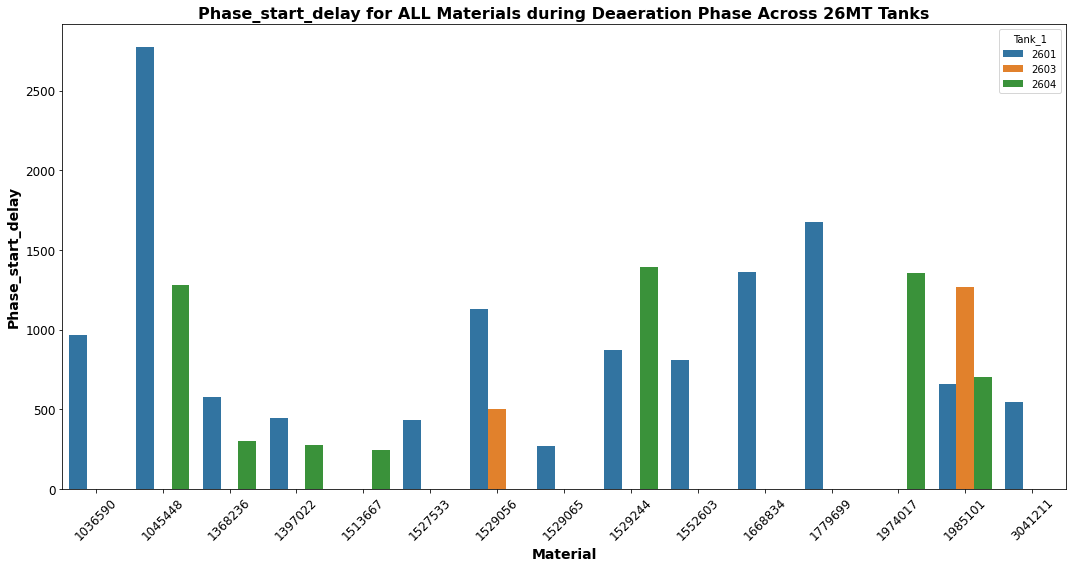

In [16]:
plt.figure(figsize=(15, 8))
sns.barplot(data=filtered_data, x='Material', y='Phase_start_delay', hue='Tank_1', ci=None)

plt.title('Phase_start_delay for ALL Materials during Deaeration Phase Across 26MT Tanks')
plt.ylabel('Phase_start_delay')
plt.xlabel('Material')
plt.legend(title='Tank_1', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

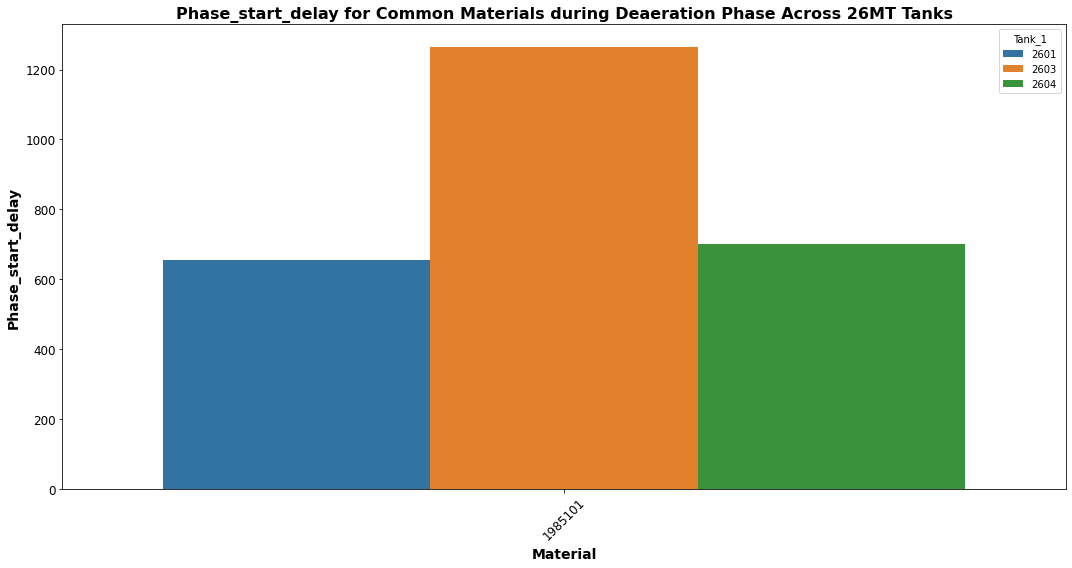

In [17]:
plt.figure(figsize=(15, 8))
sns.barplot(data=filtered_data1, x='Material', y='Phase_start_delay', hue='Tank_1', ci=None)

plt.title('Phase_start_delay for Common Materials during Deaeration Phase Across 26MT Tanks')
plt.ylabel('Phase_start_delay')
plt.xlabel('Material')
plt.legend(title='Tank_1', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
#ingredient_of_interest = ['1461896', '1254972','1031006','1243269','1196706','1815609']
#ingredient_data = data[data['INGRED_ID'] == ingredient_of_interest]

In [19]:
import pandas as pd
from tabulate import tabulate


data = pd.DataFrame(ProductionTank)
specific_tanks = [2601,2603,2604]

# Filter the dataframe for desired instruction steps
desired_steps = ['STEP2_CONS-Deaeration']
filtered_data = Data[(Data['Instruction_Step'].isin(desired_steps)) & (Data['Tank_1'].isin(specific_tanks))]


# Calculate total phase duration for each desired instruction step for each tank and material
total_Phase_start_delay = filtered_data.groupby(['Tank_1','BATCHID','Instruction_Step'])['Phase_start_delay'].sum().reset_index()

# Present in table format
#print(tabulate(total_durations, headers='keys', tablefmt='grid'))



#Aggregate data per tank
aggregated_total_durations_df2 = filtered_data.groupby(['Tank_1','BATCHID','Material']).agg({
  #  'BATCHID': 'count',
    # 'Material': 'count',
    'Phase_duration': 'sum',
    'Phase_overrun': 'sum',
    'Phase_start_delay':'sum',
    'Quantity':'sum',
    'Flowrate_KGMIN':'sum',
    'Target_Phase_duration':'mean',
    'Target_Flowrate':'mean'
}).reset_index()


#print(aggregated_total_durations_df2)
#print(total_Phase_start_delay)


aggregated_total_durations_df2.to_csv('DeaerationPhase26MT.csv', index=False)


In [20]:
import pandas as pd
from tabulate import tabulate


data = pd.DataFrame(ProductionTank)
specific_tanks = [2601,2603,2604]

# Filter the dataframe for desired instruction steps
desired_steps = ['STEP2_CONS-Deaeration']
filtered_data = Data[(Data['Instruction_Step'].isin(desired_steps)) & (Data['Tank_1'].isin(specific_tanks))]


# Calculate total phase duration for each desired instruction step for each tank and material
total_Phase_start_delay = filtered_data.groupby(['Tank_1','Material','Instruction_Step'])['Phase_start_delay'].sum().reset_index()

# Present in table format
#print(tabulate(total_durations, headers='keys', tablefmt='grid'))



#Aggregate data per tank
aggregated_total_durations_df2 = filtered_data.groupby(['Tank_1','BATCHID','Material']).agg({
  #  'BATCHID': 'count',
    # 'Material': 'count',
    'Phase_duration': 'sum',
    'Phase_overrun': 'sum',
    'Phase_start_delay':'sum',
    'Quantity':'sum',
    'Flowrate_KGMIN':'sum',
    'Target_Phase_duration':'mean',
    'Target_Flowrate':'mean'
}).reset_index()


#print(aggregated_total_durations_df2)
aggregated_total_durations_df2.to_csv('DeaerationPhase25MT.csv', index=False)

In [21]:
# Handling missing values
#aggregated_total_durations_df2.dropna(inplace=True)  # Remove rows with missing values

In [22]:
# Handling du# Handling duplicates
#aggregated_total_durations_df2.drop_duplicates(inplace=True)  # Remove duplicate rowsplicates

In [23]:
# Define columns where you want to detect and remove outliers
ProductionTank26_df = pd.DataFrame(aggregated_total_durations_df2)
ProductionTank26_df
columns_to_check = ['Phase_duration', 'Phase_overrun', 'Phase_start_delay', 'Flowrate_KGMIN', 'Target_Phase_duration']

# Define a function to remove outliers using IQR
def remove_outliers_iqr(data, column, iqr_multiplier=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers for each column
for col in columns_to_check:
  ProductionTank26_df = remove_outliers_iqr(ProductionTank26_df, col)
# Display the cleaned DataFrame
#print(ProductionTank26_df)

In [24]:
# Define columns where you want to detect and remove outliers
ProductionTank26_df1 = pd.DataFrame(aggregated_total_durations_df2)

columns_to_check = ['Phase_duration', 'Phase_overrun', 'Phase_start_delay', 'Flowrate_KGMIN', 'Target_Phase_duration']

# Define a function to remove outliers using IQR
def remove_outliers_iqr(data, column, iqr_multiplier=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers for each column
for col in columns_to_check:
  ProductionTank26_df1 = remove_outliers_iqr(ProductionTank26_df1, col)
# Display the cleaned DataFrame
#print(ProductionTank26_df)

In [25]:
# Scaling numerical variables (if needed)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['Phase_duration', 'Phase_overrun', 'Phase_start_delay', 'Flowrate_KGMIN']
ProductionTank26_df[numerical_cols] = scaler.fit_transform(ProductionTank26_df[numerical_cols])
print(ProductionTank26_df)

    Tank_1    BATCHID  Material  Phase_duration  Phase_overrun  \
0     2601  107579279   1985101        0.123824       0.123824   
3     2601  107657881   1985101       -0.647692      -0.647692   
4     2601  107671161   1036590       -0.519106      -0.519106   
5     2601  107691051   1985101       -0.647692      -0.647692   
6     2601  107718990   3041211       -0.519106      -0.519106   
8     2601  107731815   1036590        0.638168       0.638168   
9     2601  107734265   1985101       -0.647692      -0.647692   
12    2601  107769534   1036590       -0.647692      -0.647692   
14    2601  107792342   1529065       -0.776278      -0.776278   
15    2601  107795797   1985101       -0.647692      -0.647692   
19    2601  107831957   1985101       -1.033451      -1.033451   
20    2601  107842003   1036590       -0.261934      -0.261934   
21    2601  107873947   1045448       -0.004762      -0.004762   
24    2601  107913400   1036590        1.023926       1.023926   
25    2601

In [26]:
# For the original DataFrame
print("Original DataFrame Summary Statistics:")
print(aggregated_total_durations_df2.describe())

# After removing outliers
print("\nCleaned DataFrame Summary Statistics:")
print(ProductionTank26_df.describe())

Original DataFrame Summary Statistics:
            Tank_1       BATCHID      Material  Phase_duration  Phase_overrun  \
count    46.000000  4.600000e+01  4.600000e+01       46.000000      46.000000   
mean   2601.739130  1.078125e+08  1.533657e+06       19.173913      13.956522   
std       1.272526  1.520487e+05  4.462251e+05       24.848254      24.337403   
min    2601.000000  1.075593e+08  1.036590e+06        3.000000       0.000000   
25%    2601.000000  1.077052e+08  1.045448e+06        7.000000       2.000000   
50%    2601.000000  1.077941e+08  1.529056e+06       11.000000       6.000000   
75%    2602.500000  1.079336e+08  1.985101e+06       21.750000      17.500000   
max    2604.000000  1.080818e+08  3.041211e+06      138.000000     129.000000   

       Phase_start_delay    Quantity  Flowrate_KGMIN  Target_Phase_duration  \
count          46.000000   46.000000       46.000000              46.000000   
mean         1093.608696  136.017804       15.778509               5.0760

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from tabulate import tabulate
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset (replace 'ProductionTank2203_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank26_df)

# Define features and target
#X = df.drop(['Phase_start_delay'], axis=1)

#y = df['Phase_start_delay']

# Define features and target
X = df.drop(['Target_Phase_duration','Target_Flowrate','Phase_overrun'], axis=1)
y = df['Phase_overrun']



# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred_train = lr_model.predict(X_train)
lr_pred_test = lr_model.predict(X_test)
lr_train_mse = mean_squared_error(y_train, lr_pred_train)
lr_test_mse = mean_squared_error(y_test, lr_pred_test)
lr_train_r2 = r2_score(y_train, lr_pred_train)
lr_test_r2 = r2_score(y_test, lr_pred_test)
results_df = results_df.append({'Model': 'Linear Regression', 'Train MSE': lr_train_mse, 'Test MSE': lr_test_mse, 'Train R2': lr_train_r2, 'Test R2': lr_test_r2}, ignore_index=True)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred_train = ridge_model.predict(X_train)
ridge_pred_test = ridge_model.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_pred_train)
ridge_test_mse = mean_squared_error(y_test, ridge_pred_test)
ridge_train_r2 = r2_score(y_train, ridge_pred_train)
ridge_test_r2 = r2_score(y_test, ridge_pred_test)
results_df = results_df.append({'Model': 'Ridge Regression', 'Train MSE': ridge_train_mse, 'Test MSE': ridge_test_mse, 'Train R2': ridge_train_r2, 'Test R2': ridge_test_r2}, ignore_index=True)

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
lasso_pred_train = lasso_model.predict(X_train)
lasso_pred_test = lasso_model.predict(X_test)
lasso_train_mse = mean_squared_error(y_train, lasso_pred_train)
lasso_test_mse = mean_squared_error(y_test, lasso_pred_test)
lasso_train_r2 = r2_score(y_train, lasso_pred_train)
lasso_test_r2 = r2_score(y_test, lasso_pred_test)
results_df = results_df.append({'Model': 'Lasso Regression', 'Train MSE': lasso_train_mse, 'Test MSE': lasso_test_mse, 'Train R2': lasso_train_r2, 'Test R2': lasso_test_r2}, ignore_index=True)

# RandomForest Regressor
#rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, min_samples_split=10, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred_train = rf_model.predict(X_train)
rf_pred_test = rf_model.predict(X_test)
rf_train_mse = mean_squared_error(y_train, rf_pred_train)
rf_test_mse = mean_squared_error(y_test, rf_pred_test)
rf_train_r2 = r2_score(y_train, rf_pred_train)
rf_test_r2 = r2_score(y_test, rf_pred_test)
results_df = results_df.append({'Model': 'Random Forest Regressor', 'Train MSE': rf_train_mse, 'Test MSE': rf_test_mse, 'Train R2': rf_train_r2, 'Test R2': rf_test_r2}, ignore_index=True)

# Gradient Boosting Regressor
#gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=50, learning_rate=0.05, max_depth=5, subsample=0.8, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred_train = gb_model.predict(X_train)
gb_pred_test = gb_model.predict(X_test)
gb_train_mse = mean_squared_error(y_train, gb_pred_train)
gb_test_mse = mean_squared_error(y_test, gb_pred_test)
gb_train_r2 = r2_score(y_train, gb_pred_train)
gb_test_r2 = r2_score(y_test, gb_pred_test)
results_df = results_df.append({'Model': 'Gradient Boosting Regressor', 'Train MSE': gb_train_mse, 'Test MSE': gb_test_mse, 'Train R2': gb_train_r2, 'Test R2': gb_test_r2}, ignore_index=True)


# Decision Tree Regressor
#dt_model = DecisionTreeRegressor(random_state=42)
dt_model = DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=42)
dt_model.fit(X_train, y_train)
dt_pred_train = dt_model.predict(X_train)
dt_pred_test = dt_model.predict(X_test)
dt_train_mse = mean_squared_error(y_train, dt_pred_train)
dt_test_mse = mean_squared_error(y_test, dt_pred_test)
dt_train_r2 = r2_score(y_train, dt_pred_train)
dt_test_r2 = r2_score(y_test, dt_pred_test)
results_df = results_df.append({'Model': 'Decision Tree Regressor', 'Train MSE': dt_train_mse, 'Test MSE': dt_test_mse, 'Train R2': dt_train_r2, 'Test R2': dt_test_r2}, ignore_index=True)

# Bagging Regressor (based on Decision Trees by default)
bag_model = BaggingRegressor(n_estimators=100, random_state=42)
bag_model.fit(X_train, y_train)
bag_pred_train = bag_model.predict(X_train)
bag_pred_test = bag_model.predict(X_test)
bag_train_mse = mean_squared_error(y_train, bag_pred_train)
bag_test_mse = mean_squared_error(y_test, bag_pred_test)
bag_train_r2 = r2_score(y_train, bag_pred_train)
bag_test_r2 = r2_score(y_test, bag_pred_test)
results_df = results_df.append({'Model': 'Bagging Regressor', 'Train MSE': bag_train_mse, 'Test MSE': bag_test_mse, 'Train R2': bag_train_r2, 'Test R2': bag_test_r2}, ignore_index=True)

# AdaBoost Regressor
ada_model = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)
ada_pred_train = ada_model.predict(X_train)
ada_pred_test = ada_model.predict(X_test)
ada_train_mse = mean_squared_error(y_train, ada_pred_train)
ada_test_mse = mean_squared_error(y_test, ada_pred_test)
ada_train_r2 = r2_score(y_train, ada_pred_train)
ada_test_r2 = r2_score(y_test, ada_pred_test)
results_df = results_df.append({'Model': 'AdaBoost Regressor', 'Train MSE': ada_train_mse, 'Test MSE': ada_test_mse, 'Train R2': ada_train_r2, 'Test R2': ada_test_r2}, ignore_index=True)

# Extra Trees Regressor
et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)
et_model.fit(X_train, y_train)
et_pred_train = et_model.predict(X_train)
et_pred_test = et_model.predict(X_test)
et_train_mse = mean_squared_error(y_train, et_pred_train)
et_test_mse = mean_squared_error(y_test, et_pred_test)
et_train_r2 = r2_score(y_train, et_pred_train)
et_test_r2 = r2_score(y_test, et_pred_test)
results_df = results_df.append({'Model': 'Extra Trees Regressor', 'Train MSE': et_train_mse, 'Test MSE': et_test_mse, 'Train R2': et_train_r2, 'Test R2': et_test_r2}, ignore_index=True)


# Print the results DataFrame
#print(results_df)
# Print the results DataFrame in tabulated form
print(tabulate(results_df, headers='keys', tablefmt='grid'))
# Save results DataFrame to an Excel file
results_df.to_excel('26DEresults.xlsx', index=False)


+----+-----------------------------+-------------+-------------+------------+-----------+
|    | Model                       |   Train MSE |    Test MSE |   Train R2 |   Test R2 |
+====+=============================+=============+=============+============+===========+
|  0 | Linear Regression           | 2.91025e-28 | 9.84715e-30 |   1        |  1        |
+----+-----------------------------+-------------+-------------+------------+-----------+
|  1 | Ridge Regression            | 0.00556528  | 0.00230869  |   0.995292 |  0.993531 |
+----+-----------------------------+-------------+-------------+------------+-----------+
|  2 | Lasso Regression            | 0.900066    | 0.26011     |   0.238523 |  0.271128 |
+----+-----------------------------+-------------+-------------+------------+-----------+
|  3 | Random Forest Regressor     | 0.0725732   | 0.034278    |   0.938601 |  0.903947 |
+----+-----------------------------+-------------+-------------+------------+-----------+
|  4 | Gra

In [28]:
# Create a list of models with their respective hyperparameters
# Initialize models
models = [
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=1.0),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    MLPRegressor(),
    DecisionTreeRegressor(random_state=42),
    AdaBoostRegressor(n_estimators=100, random_state=42),
    BaggingRegressor(n_estimators=100, random_state=42)
]

# Perform cross-validation for each model
for model in models:
    model_name = model.__class__.__name__
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -scores  # Convert negative MSE back to positive
    mean_mse = mse_scores.mean()
    std_mse = mse_scores.std()
    print(f"{model_name}:\n  Mean MSE: {mean_mse:.6f}\n  Std MSE: {std_mse:.6f}\n")
     # Save the results to an Excel file
df.to_excel("26MTmodel_results.xlsx", index=False)
#a file named model_results.xlsx in the current working directory containing the mean and standard deviation of the MSE for each model. You can then open this file with Excel to view the results.

   

LinearRegression:
  Mean MSE: 0.000000
  Std MSE: 0.000000

Ridge:
  Mean MSE: 0.026738
  Std MSE: 0.019066

Lasso:
  Mean MSE: 1.272662
  Std MSE: 0.891838

RandomForestRegressor:
  Mean MSE: 0.129507
  Std MSE: 0.148719

GradientBoostingRegressor:
  Mean MSE: 0.086769
  Std MSE: 0.089318

SVR:
  Mean MSE: 1.319403
  Std MSE: 1.163110

MLPRegressor:
  Mean MSE: 4187713889336.203125
  Std MSE: 4132454923394.244629

DecisionTreeRegressor:
  Mean MSE: 0.078373
  Std MSE: 0.072460

AdaBoostRegressor:
  Mean MSE: 0.067316
  Std MSE: 0.044796

BaggingRegressor:
  Mean MSE: 0.108060
  Std MSE: 0.141107



In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Load your dataset (replace 'ProductionTank2202_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank26_df)

# Define features and target
#X = df.drop(['Phase_overrun'], axis=1)
#y = df['Phase_overrun']

X = df.drop(['Target_Phase_duration','Target_Flowrate','Phase_overrun'], axis=1)
y = df['Phase_overrun']



# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred_train = lr_model.predict(X_train)
lr_pred_test = lr_model.predict(X_test)
lr_train_mse = mean_squared_error(y_train, lr_pred_train)
lr_test_mse = mean_squared_error(y_test, lr_pred_test)
lr_train_r2 = r2_score(y_train, lr_pred_train)
lr_test_r2 = r2_score(y_test, lr_pred_test)
results_df = results_df.append({'Model': 'Linear Regression', 'Train MSE': lr_train_mse, 'Test MSE': lr_test_mse, 'Train R2': lr_train_r2, 'Test R2': lr_test_r2}, ignore_index=True)

# Ridge Regression with Hyperparameter Tuning
ridge_params = {'alpha': [0.01, 0.1, 1.0, 10.0]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5)
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_
ridge_pred_train = best_ridge.predict(X_train)
ridge_pred_test = best_ridge.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_pred_train)
ridge_test_mse = mean_squared_error(y_test, ridge_pred_test)
ridge_train_r2 = r2_score(y_train, ridge_pred_train)
ridge_test_r2 = r2_score(y_test, ridge_pred_test)
results_df = results_df.append({'Model': 'Ridge Regression', 'Train MSE': ridge_train_mse, 'Test MSE': ridge_test_mse, 'Train R2': ridge_train_r2, 'Test R2': ridge_test_r2}, ignore_index=True)
print(f"Best parameters for Ridge Regression: {ridge_grid.best_params_}")

# Lasso Regression with Hyperparameter Tuning
lasso_params = {'alpha': [0.01, 0.1, 1.0, 10.0]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5)
lasso_grid.fit(X_train, y_train)
best_lasso = lasso_grid.best_estimator_
lasso_pred_train = best_lasso.predict(X_train)
lasso_pred_test = best_lasso.predict(X_test)
lasso_train_mse = mean_squared_error(y_train, lasso_pred_train)
lasso_test_mse = mean_squared_error(y_test, lasso_pred_test)
lasso_train_r2 = r2_score(y_train, lasso_pred_train)
lasso_test_r2 = r2_score(y_test, lasso_pred_test)
results_df = results_df.append({'Model': 'Lasso Regression', 'Train MSE': lasso_train_mse, 'Test MSE': lasso_test_mse, 'Train R2': lasso_train_r2, 'Test R2': lasso_test_r2}, ignore_index=True)
print(f"Best parameters for Lasso Regression: {lasso_grid.best_params_}")

# Random Forest Regressor with Hyperparameter Tuning
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(RandomForestRegressor(), rf_params, cv=5)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
rf_pred_train = best_rf.predict(X_train)
rf_pred_test = best_rf.predict(X_test)
rf_train_mse = mean_squared_error(y_train, rf_pred_train)
rf_test_mse = mean_squared_error(y_test, rf_pred_test)
rf_train_r2 = r2_score(y_train, rf_pred_train)
rf_test_r2 = r2_score(y_test, rf_pred_test)
rf_feature_importance = rf_model.feature_importances_
results_df = results_df.append({'Model': 'Random Forest Regressor', 'Train MSE': rf_train_mse, 'Test MSE': rf_test_mse, 'Train R2': rf_train_r2, 'Test R2': rf_test_r2}, ignore_index=True)
print(f"Best parameters for Random Forest Regressor: {rf_grid.best_params_}")

# Gradient Boosting Regressor with Hyperparameter Tuning
gb_params = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5]}
gb_grid = GridSearchCV(GradientBoostingRegressor(), gb_params, cv=5)
gb_grid.fit(X_train, y_train)
best_gb = gb_grid.best_estimator_
gb_pred_train = best_gb.predict(X_train)
gb_pred_test = best_gb.predict(X_test)
gb_train_mse = mean_squared_error(y_train, gb_pred_train)
gb_test_mse = mean_squared_error(y_test, gb_pred_test)
gb_train_r2 = r2_score(y_train, gb_pred_train)
gb_test_r2 = r2_score(y_test, gb_pred_test)
gb_feature_importance = rf_model.feature_importances_
results_df = results_df.append({'Model': 'Gradient Boosting Regressor', 'Train MSE': gb_train_mse, 'Test MSE': gb_test_mse, 'Train R2': gb_train_r2, 'Test R2': gb_test_r2}, ignore_index=True)
print(f"Best parameters for Gradient Boosting Regressor: {gb_grid.best_params_}")

# Decision Tree Regressor with Hyperparameter Tuning
dt_params = {'max_depth': [None, 10, 20]}
dt_grid = GridSearchCV(DecisionTreeRegressor(), dt_params, cv=5)
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_
dt_pred_train = best_dt.predict(X_train)
dt_pred_test = best_dt.predict(X_test)
dt_train_mse = mean_squared_error(y_train, dt_pred_train)
dt_test_mse = mean_squared_error(y_test, dt_pred_test)
dt_train_r2 = r2_score(y_train, dt_pred_train)
dt_test_r2 = r2_score(y_test, dt_pred_test)
results_df = results_df.append({'Model': 'Decision Tree Regressor', 'Train MSE': dt_train_mse, 'Test MSE': dt_test_mse, 'Train R2': dt_train_r2, 'Test R2': dt_test_r2}, ignore_index=True)
print(f"Best parameters for Decision Tree Regressor: {dt_grid.best_params_}")

# Bagging Regressor with Hyperparameter Tuning
bag_params = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

bag_grid = GridSearchCV(BaggingRegressor(random_state=42), bag_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
bag_grid.fit(X_train, y_train)
bag_best = bag_grid.best_estimator_

# Using the best estimator from GridSearch to make predictions
bag_pred_train = bag_best.predict(X_train)
bag_pred_test = bag_best.predict(X_test)
bag_train_mse = mean_squared_error(y_train, bag_pred_train)
bag_test_mse = mean_squared_error(y_test, bag_pred_test)
bag_train_r2 = r2_score(y_train, bag_pred_train)
bag_test_r2 = r2_score(y_test, bag_pred_test)
results_df = results_df.append({'Model': 'Bagging Regressor', 'Train MSE': bag_train_mse, 'Test MSE': bag_test_mse, 'Train R2': bag_train_r2, 'Test R2': bag_test_r2}, ignore_index=True)
print(f"Best parameters for Bagging Regressor: {bag_grid.best_params_}")

# AdaBoost Regressor with Hyperparameter Tuning
ada_model = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1]
}
ada_grid = GridSearchCV(AdaBoostRegressor(random_state=42), ada_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ada_model.fit(X_train, y_train)
#ada_best = ada_grid.best_estimator_

# Use the best estimator to make predictions
#ada_pred_train = best_ada.predict(X_train)
#ada_pred_test = best_ada.predict(X_test)

ada_train_mse = mean_squared_error(y_train, ada_pred_train)
ada_test_mse = mean_squared_error(y_test, ada_pred_test)
ada_train_r2 = r2_score(y_train, ada_pred_train)
ada_test_r2 = r2_score(y_test, ada_pred_test)
results_df = results_df.append({'Model': 'AdaBoost Regressor', 'Train MSE': ada_train_mse, 'Test MSE': ada_test_mse, 'Train R2': ada_train_r2, 'Test R2': ada_test_r2}, ignore_index=True)

# Print the results DataFrame
print(results_df)
# Print the results DataFrame in tabulated form
print(tabulate(results_df, headers='keys', tablefmt='grid'))
# Save results DataFrame to an Excel file
results_df.to_excel('26DETUNresults.xlsx', index=False)

Best parameters for Ridge Regression: {'alpha': 0.01}
Best parameters for Lasso Regression: {'alpha': 0.01}
Best parameters for Random Forest Regressor: {'max_depth': None, 'n_estimators': 300}
Best parameters for Gradient Boosting Regressor: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Best parameters for Decision Tree Regressor: {'max_depth': None}
Best parameters for Bagging Regressor: {'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 100}
                         Model     Train MSE      Test MSE  Train R2   Test R2
0            Linear Regression  2.910251e-28  9.847151e-30  1.000000  1.000000
1             Ridge Regression  1.502089e-06  6.269259e-07  0.999999  0.999998
2             Lasso Regression  9.000649e-05  2.601097e-05  0.999924  0.999927
3      Random Forest Regressor  1.288944e-02  2.436304e-02  0.989095  0.931731
4  Gradient Boosting Regressor  1.967227e-16  2.881587e-02  1.000000  0.919253
5      Decision Tree Regressor  0.000000e+00  3.196643e-

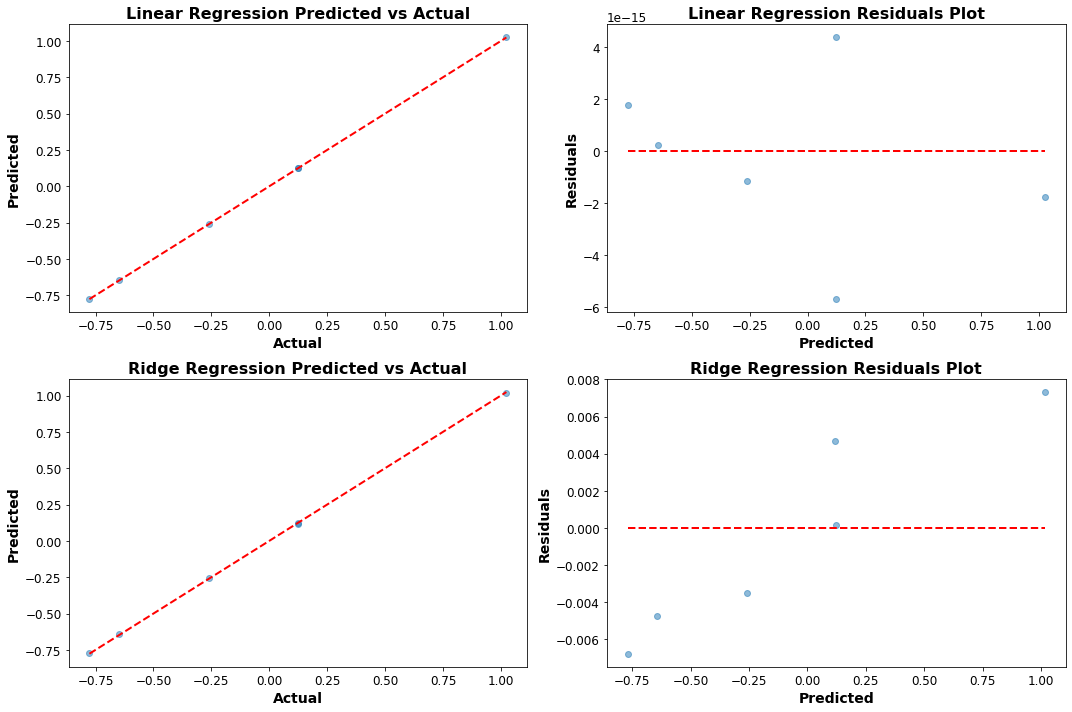

In [30]:
# Visualization function
def plot_predictions(models, actual, predictions, model_names):
    fig, ax = plt.subplots(len(models), 2, figsize=(15, 5*len(models)))
    
    for i, (model, pred, name) in enumerate(zip(models, predictions, model_names)):
        # Scatter plot of predicted vs actual
        ax[i][0].scatter(actual, pred, alpha=0.5)
        ax[i][0].plot([min(actual), max(actual)], [min(actual), max(actual)], '--', lw=2, color='red')
        ax[i][0].set_title(f'{name} Predicted vs Actual')
        ax[i][0].set_xlabel('Actual')
        ax[i][0].set_ylabel('Predicted')

        # Residuals plot
        residuals = actual - pred
        ax[i][1].scatter(pred, residuals, alpha=0.5)
        ax[i][1].hlines(0, min(pred), max(pred), colors='red', linestyles='--', lw=2)
        ax[i][1].set_title(f'{name} Residuals Plot')
        ax[i][1].set_xlabel('Predicted')
        ax[i][1].set_ylabel('Residuals')

    plt.tight_layout()
    plt.show()

# Collecting models and their predictions
models_list = [lr_model,best_lasso]
predictions_list = [lr_pred_test, lasso_pred_test]
model_names = ['Linear Regression', 'Ridge Regression']

# Plotting
plot_predictions(models_list, y_test, predictions_list, model_names)

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from tabulate import tabulate
from sklearn.model_selection import GridSearchCV

# Assuming you've loaded 'ProductionTank22_df2' somewhere in your code
df = pd.DataFrame(ProductionTank26_df1)

X = df.drop(['Target_Phase_duration','Target_Flowrate','Phase_overrun'], axis=1)
y = df['Phase_overrun']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2', 'CV MSE Mean', 'CV MSE Std'])

# Function to perform model training, prediction and storing results
def evaluate_model(model, name):
    model.fit(X_train_scaled, y_train)
    
    pred_train = model.predict(X_train_scaled)
    pred_test = model.predict(X_test_scaled)
    
    train_mse = mean_squared_error(y_train, pred_train)
    test_mse = mean_squared_error(y_test, pred_test)
    
    train_r2 = r2_score(y_train, pred_train)
    test_r2 = r2_score(y_test, pred_test)
    
    # Perform cross-validation
    cv_scores = -cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()

    results_df.loc[name] = [name, train_mse, test_mse, train_r2, test_r2, cv_mean, cv_std]

# K-Nearest Neighbors
knn_model = KNeighborsRegressor(n_neighbors=5)
evaluate_model(knn_model, 'K-Nearest Neighbors')

# Support Vector Machine
svm_model = SVR(kernel='rbf')
evaluate_model(svm_model, 'Support Vector Machine')

print(tabulate(results_df, headers='keys', tablefmt='grid'))

results_df.to_excel('knn_svm_results.xlsx', index=False)

def hypertune_model(model, params, name):
    grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
    grid_search.fit(X_train_scaled, y_train)

    best_model = grid_search.best_estimator_

    evaluate_model(best_model, name)
    print(f"Best parameters for {name}: {grid_search.best_params_}")

# K-Nearest Neighbors
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
hypertune_model(KNeighborsRegressor(), knn_params, 'K-Nearest Neighbors')

# Support Vector Machine
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear', 'poly'],
    'degree': [2, 3],
    'gamma': ['scale', 'auto']
}
hypertune_model(SVR(), svm_params, 'Support Vector Machine')

print(tabulate(results_df, headers='keys', tablefmt='grid'))

results_df.to_excel('26MTknn_svm_results_hyper_tuned.xlsx', index=False)

+------------------------+------------------------+-------------+------------+------------+-----------+---------------+--------------+
|                        | Model                  |   Train MSE |   Test MSE |   Train R2 |   Test R2 |   CV MSE Mean |   CV MSE Std |
+========================+========================+=============+============+============+===========+===============+==============+
| K-Nearest Neighbors    | K-Nearest Neighbors    |     12.2457 |    7.14667 |   0.828701 |  0.66888  |       37.2316 |      46.6384 |
+------------------------+------------------------+-------------+------------+------------+-----------+---------------+--------------+
| Support Vector Machine | Support Vector Machine |     55.8849 |   15.802   |   0.218256 |  0.267862 |       72.8135 |      82.9203 |
+------------------------+------------------------+-------------+------------+------------+-----------+---------------+--------------+
Fitting 5 folds for each of 32 candidates, totalling 16

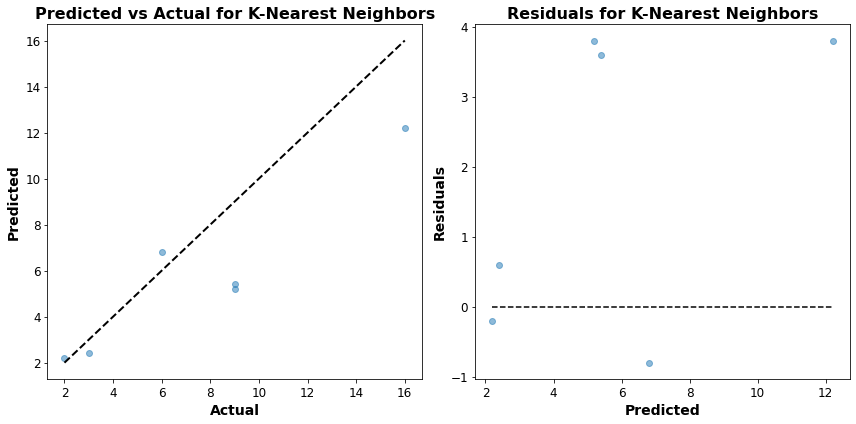

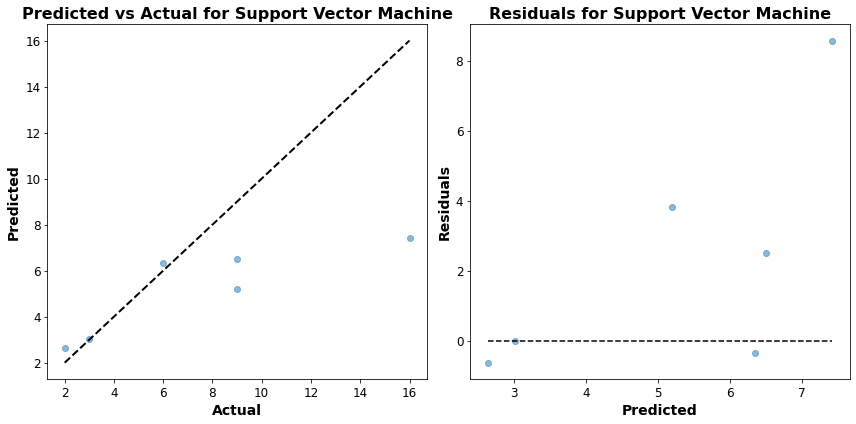

+------------------------+------------------------+-------------+------------+------------+-----------+---------------+--------------+
|                        | Model                  |   Train MSE |   Test MSE |   Train R2 |   Test R2 |   CV MSE Mean |   CV MSE Std |
+========================+========================+=============+============+============+===========+===============+==============+
| K-Nearest Neighbors    | K-Nearest Neighbors    |     12.2457 |    7.14667 |   0.828701 |  0.66888  |       37.2316 |      46.6384 |
+------------------------+------------------------+-------------+------------+------------+-----------+---------------+--------------+
| Support Vector Machine | Support Vector Machine |     55.8849 |   15.802   |   0.218256 |  0.267862 |       72.8135 |      82.9203 |
+------------------------+------------------------+-------------+------------+------------+-----------+---------------+--------------+
Fitting 5 folds for each of 32 candidates, totalling 16

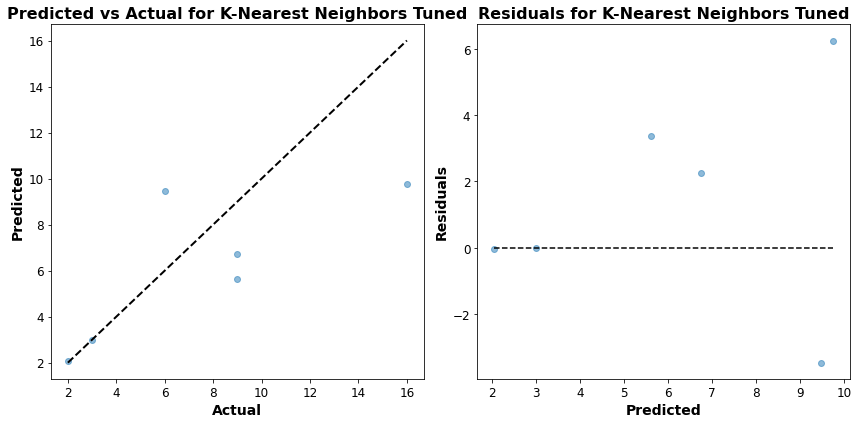

Best parameters for K-Nearest Neighbors Tuned: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
Fitting 5 folds for each of 36 candidates, totalling 180 fits


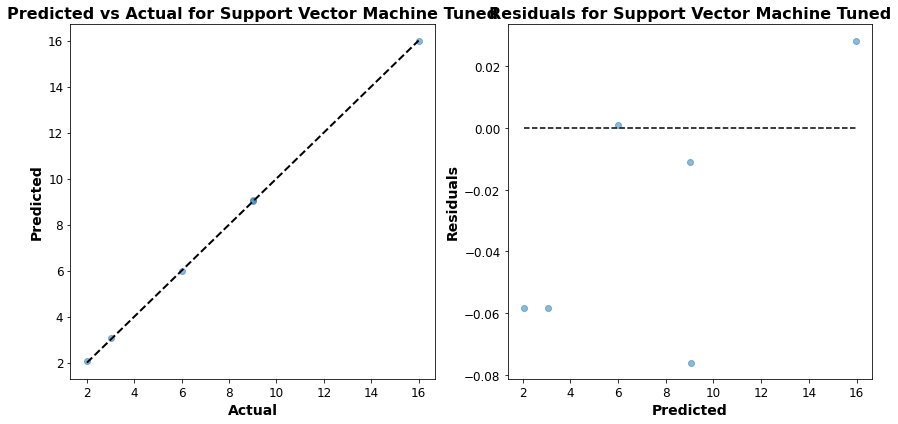

Best parameters for Support Vector Machine Tuned: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
+------------------------------+------------------------------+-------------+-------------+------------+-----------+---------------+--------------+
|                              | Model                        |   Train MSE |    Test MSE |   Train R2 |   Test R2 |   CV MSE Mean |   CV MSE Std |
+==============================+==============================+=============+=============+============+===========+===============+==============+
| K-Nearest Neighbors          | K-Nearest Neighbors          |    12.2457  |  7.14667    |   0.828701 |  0.66888  |    37.2316    |   46.6384    |
+------------------------------+------------------------------+-------------+-------------+------------+-----------+---------------+--------------+
| Support Vector Machine       | Support Vector Machine       |    55.8849  | 15.802      |   0.218256 |  0.267862 |    72.8135    |   82.9203    |
+

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from tabulate import tabulate
from sklearn.model_selection import GridSearchCV

# Load data
df = pd.DataFrame(ProductionTank26_df1)

# Define features and target
X = df.drop(['Phase_overrun','Target_Flowrate','Target_Phase_duration'], axis=1)
y = df['Phase_overrun']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2', 'CV MSE Mean', 'CV MSE Std'])

# Function to perform model training, prediction, storing results, and visualizations
def evaluate_model(model, name):
    model.fit(X_train_scaled, y_train)
    
    pred_train = model.predict(X_train_scaled)
    pred_test = model.predict(X_test_scaled)
    
    train_mse = mean_squared_error(y_train, pred_train)
    test_mse = mean_squared_error(y_test, pred_test)
    
    train_r2 = r2_score(y_train, pred_train)
    test_r2 = r2_score(y_test, pred_test)
    
    # Perform cross-validation
    cv_scores = -cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()

    results_df.loc[name] = [name, train_mse, test_mse, train_r2, test_r2, cv_mean, cv_std]
    
    # Plot predicted vs actual
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, pred_test, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Predicted vs Actual for {name}')
    
    # Plot residuals
    plt.subplot(1, 2, 2)
    residuals = y_test - pred_test
    plt.scatter(pred_test, residuals, alpha=0.5)
    plt.hlines(y=0, xmin=pred_test.min(), xmax=pred_test.max(), colors='k', linestyles='dashed')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.title(f'Residuals for {name}')
    
    plt.tight_layout()
    plt.show()

# Model evaluations
evaluate_model(KNeighborsRegressor(n_neighbors=5), 'K-Nearest Neighbors')
evaluate_model(SVR(kernel='rbf'), 'Support Vector Machine')

print(tabulate(results_df, headers='keys', tablefmt='grid'))
results_df.to_excel('knn_svm_results.xlsx', index=False)

# Hyperparameter tuning
def hypertune_model(model, params, name):
    grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
    grid_search.fit(X_train_scaled, y_train)

    best_model = grid_search.best_estimator_
    evaluate_model(best_model, name)
    
    print(f"Best parameters for {name}: {grid_search.best_params_}")

# Hyperparameter tuning for KNN and SVM
hypertune_model(KNeighborsRegressor(), knn_params, 'K-Nearest Neighbors Tuned')
hypertune_model(SVR(), svm_params, 'Support Vector Machine Tuned')

print(tabulate(results_df, headers='keys', tablefmt='grid'))
results_df.to_excel('knn_svm_23GAGresultsTUNED_hyper_tuned.xlsx', index=False)

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D
from tabulate import tabulate

# Load your dataset (replace 'ProductionTank22_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank26_df1)

# Define features and target
#X = df.drop(['Phase_overrun', 'Target_Flowrate', 'Target_Phase_duration'], axis=1)
#y = df['Phase_overrun']

X = df.drop(['Target_Phase_duration','Target_Flowrate','Phase_overrun'], axis=1)
y = df['Phase_overrun']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Define a simple feedforward neural network
def build_simple_nn():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train and evaluate the simple neural network
simple_nn = build_simple_nn()
simple_nn.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)
pred_train_simple_nn = simple_nn.predict(X_train_scaled)
pred_test_simple_nn = simple_nn.predict(X_test_scaled)
train_mse_simple_nn = mean_squared_error(y_train, pred_train_simple_nn)
test_mse_simple_nn = mean_squared_error(y_test, pred_test_simple_nn)
train_r2_simple_nn = r2_score(y_train, pred_train_simple_nn)
test_r2_simple_nn = r2_score(y_test, pred_test_simple_nn)
results_df = results_df.append({'Model': 'Simple Neural Network', 'Train MSE': train_mse_simple_nn,
                                'Test MSE': test_mse_simple_nn, 'Train R2': train_r2_simple_nn, 'Test R2': test_r2_simple_nn},
                               ignore_index=True)

print(tabulate(results_df, headers='keys', tablefmt='grid'))

results_df.to_excel('Simple Neural Network.xlsx', index=False)

from keras.layers import LSTM

# Assuming X_train_scaled and X_test_scaled are already prepared

# Reshape input data for LSTM (samples, timesteps, features)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Define LSTM model
def build_lstm():
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train and evaluate the LSTM
lstm = build_lstm()
lstm.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=0)
pred_train_lstm = lstm.predict(X_train_reshaped)
pred_test_lstm = lstm.predict(X_test_reshaped)
train_mse_lstm = mean_squared_error(y_train, pred_train_lstm)
test_mse_lstm = mean_squared_error(y_test, pred_test_lstm)
train_r2_lstm = r2_score(y_train, pred_train_lstm)
test_r2_lstm = r2_score(y_test, pred_test_lstm)
results_df = results_df.append({'Model': 'LSTM Neural Network', 'Train MSE': train_mse_lstm,
                                'Test MSE': test_mse_lstm, 'Train R2': train_r2_lstm, 'Test R2': test_r2_lstm},
                               ignore_index=True)
print(tabulate(results_df, headers='keys', tablefmt='grid'))


results_df.to_excel('26MTLSTM  SIMPLE Neural Network.xlsx', index=False)

1/1 [==============================] - 0s 28ms/step
+----+-----------------------+-------------+------------+------------+-----------+
|    | Model                 |   Train MSE |   Test MSE |   Train R2 |   Test R2 |
+====+=======================+=============+============+============+===========+
|  0 | Simple Neural Network |     82.0087 |    31.3755 |  -0.147175 | -0.453693 |
+----+-----------------------+-------------+------------+------------+-----------+
1/1 [==============================] - 0s 29ms/step
+----+-----------------------+-------------+------------+------------+-----------+
|    | Model                 |   Train MSE |   Test MSE |   Train R2 |   Test R2 |
+====+=======================+=============+============+============+===========+
|  0 | Simple Neural Network |     82.0087 |    31.3755 |  -0.147175 | -0.453693 |
+----+-----------------------+-------------+------------+------------+-----------+
|  1 | LSTM Neural Network   |    131.493  |    73.6687 |  -0.8393

In [34]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

# ... [your data loading, preprocessing, etc.]

# Define a parameter grid to search through
param_grid = {
    'dense1_neurons': [32, 64, 128],
    'dense2_neurons': [16, 32, 64],
    'epochs': [30, 50],
    'batch_size': [16, 32, 64],
}

# Adjust the function to take the hyperparameters as parameters
def build_simple_nn(dense1_neurons=64, dense2_neurons=32):
    model = Sequential()
    model.add(Dense(dense1_neurons, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(dense2_neurons, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Wrap the model using KerasRegressor
simple_nn_model = KerasRegressor(build_fn=build_simple_nn, verbose=0)

# GridSearchCV
simple_nn_search = GridSearchCV(estimator=simple_nn_model, param_grid=param_grid, cv=3, verbose=1)
simple_nn_search_result = simple_nn_search.fit(X_train_scaled, y_train)

# Display the best parameters
print("Best Simple NN Params:", simple_nn_search_result.best_params_)

# Predict using the best model on training data
train_preds = simple_nn_search.best_estimator_.predict(X_train_scaled)

# Calculate the MSE and R2 for the training data
train_mse = mean_squared_error(y_train, train_preds)
train_r2 = r2_score(y_train, train_preds)

# Predict using the best model on test data
test_preds = simple_nn_search.best_estimator_.predict(X_test_scaled)

# Calculate the MSE and R2 for the test data
test_mse = mean_squared_error(y_test, test_preds)
test_r2 = r2_score(y_test, test_preds)

# Print the results
print("Training MSE:", train_mse)
print("Training R^2:", train_r2)
print("Test MSE:", test_mse)
print("Test R^2:", test_r2)

# Here, you can use simple_nn_search_result.best_estimator_ to make predictions and evaluate the model.

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Simple NN Params: {'batch_size': 64, 'dense1_neurons': 128, 'dense2_neurons': 64, 'epochs': 50}
Training MSE: 44.326252665084084
Training R^2: 0.3799442547325358
Test MSE: 18.565531724235843
Test R^2: 0.13982092397362889


In [35]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the LSTM model for grid search
def create_lstm(lstm_neurons=50):
    model = Sequential()
    model.add(LSTM(lstm_neurons, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Grid search hyperparameters
lstm_param_grid = {
    'lstm_neurons': [30, 50, 70],
    'batch_size': [16, 32, 64],
    'epochs': [30, 50, 100]
}

lstm_model = KerasRegressor(build_fn=create_lstm, verbose=0)
lstm_search = GridSearchCV(estimator=lstm_model, param_grid=lstm_param_grid, cv=3, verbose=1)
lstm_search_result = lstm_search.fit(X_train_reshaped, y_train)

# Print the best parameters
print("Best LSTM Params:", lstm_search_result.best_params_)

# Predict using the best model on training data
train_preds_lstm = lstm_search_result.best_estimator_.predict(X_train_reshaped)

# Calculate the MSE and R2 for the training data
train_mse_lstm = mean_squared_error(y_train, train_preds_lstm)
train_r2_lstm = r2_score(y_train, train_preds_lstm)

# Predict using the best model on test data
test_preds_lstm = lstm_search_result.best_estimator_.predict(X_test_reshaped)

# Calculate the MSE and R2 for the test data
test_mse_lstm = mean_squared_error(y_test, test_preds_lstm)
test_r2_lstm = r2_score(y_test, test_preds_lstm)

# Print the results
print("Training MSE for LSTM:", train_mse_lstm)
print("Training R^2 for LSTM:", train_r2_lstm)
print("Test MSE for LSTM:", test_mse_lstm)
print("Test R^2 for LSTM:", test_r2_lstm)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best LSTM Params: {'batch_size': 32, 'epochs': 100, 'lstm_neurons': 70}
Training MSE for LSTM: 105.39791707235744
Training R^2 for LSTM: -0.4743539119745488
Test MSE for LSTM: 63.704650445923306
Test R^2 for LSTM: -1.9515668160273347


In [36]:
#!pip install -U keras-tuner
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameters grid for Simple Neural Network
def create_simple_nn(neurons_layer1=64, neurons_layer2=32):
    model = Sequential()
    model.add(Dense(neurons_layer1, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(neurons_layer2, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

simple_nn_param_grid = {
    'neurons_layer1': [32, 64, 128],
    'neurons_layer2': [16, 32, 64],
    'batch_size': [16, 32, 64],
    'epochs': [30, 50, 100]
}

simple_nn_model = KerasRegressor(build_fn=create_simple_nn, verbose=0)
simple_nn_search = RandomizedSearchCV(estimator=simple_nn_model, param_distributions=simple_nn_param_grid, n_iter=5, cv=3, verbose=1)
simple_nn_search_result = simple_nn_search.fit(X_train_scaled, y_train)

# Display results for Simple NN
simple_nn_results = pd.DataFrame(simple_nn_search_result.cv_results_)[['param_neurons_layer1', 'param_neurons_layer2', 'param_batch_size', 'param_epochs', 'mean_test_score', 'std_test_score', 'rank_test_score']]
print(tabulate(simple_nn_results, headers='keys', tablefmt='grid'))
# Save results DataFrame to an Excel file
simple_nn_results.to_excel('simple_nn.xlsx', index=False)
print("Best Simple NN Params:", simple_nn_search_result.best_params_)

# Define hyperparameters grid for LSTM
def create_lstm(lstm_neurons=50):
    model = Sequential()
    model.add(LSTM(lstm_neurons, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

lstm_param_grid = {
    'lstm_neurons': [30, 50, 70],
    'batch_size': [16, 32, 64],
    'epochs': [30, 50, 100]
}

lstm_model = KerasRegressor(build_fn=create_lstm, verbose=0)
lstm_search = RandomizedSearchCV(estimator=lstm_model, param_distributions=lstm_param_grid, n_iter=5, cv=3, verbose=1)
lstm_search_result = lstm_search.fit(X_train_reshaped, y_train)

# Display results for LSTM
lstm_results = pd.DataFrame(lstm_search_result.cv_results_)[['param_lstm_neurons', 'param_batch_size', 'param_epochs', 'mean_test_score', 'std_test_score', 'rank_test_score']]
print(tabulate(lstm_results, headers='keys', tablefmt='grid'))
print("Best LSTM Params:", lstm_search_result.best_params_)
# Save results DataFrame to an Excel file
lstm_results.to_excel('LSTM_results.xlsx', index=False)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
+----+------------------------+------------------------+--------------------+----------------+-------------------+------------------+-------------------+
|    |   param_neurons_layer1 |   param_neurons_layer2 |   param_batch_size |   param_epochs |   mean_test_score |   std_test_score |   rank_test_score |
+====+========================+========================+====================+================+===================+==================+===================+
|  0 |                    128 |                     16 |                 32 |            100 |          -39.7463 |          37.8266 |                 1 |
+----+------------------------+------------------------+--------------------+----------------+-------------------+------------------+-------------------+
|  1 |                     32 |                     32 |                 16 |            100 |          -56.5721 |          62.0937 |                 3 |
+----+----------

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
from tabulate import tabulate

# Load your dataset (replace 'ProductionTank22_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank26_df1)

X = df.drop(['Target_Phase_duration','Target_Flowrate','Phase_overrun'], axis=1)
y = df['Phase_overrun']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Define a simple feedforward neural network
def build_simple_nn():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train and evaluate the simple neural network
simple_nn = build_simple_nn()
simple_nn.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)
pred_train_simple_nn = simple_nn.predict(X_train_scaled)
pred_test_simple_nn = simple_nn.predict(X_test_scaled)
train_mse_simple_nn = mean_squared_error(y_train, pred_train_simple_nn)
test_mse_simple_nn = mean_squared_error(y_test, pred_test_simple_nn)
train_r2_simple_nn = r2_score(y_train, pred_train_simple_nn)
test_r2_simple_nn = r2_score(y_test, pred_test_simple_nn)
results_df = results_df.append({'Model': 'Dense Neural Network', 'Train MSE': train_mse_simple_nn,
                                'Test MSE': test_mse_simple_nn, 'Train R2': train_r2_simple_nn, 'Test R2': test_r2_simple_nn},
                               ignore_index=True)

# Print the results DataFrame
print(tabulate(results_df, headers='keys', tablefmt='grid'))

# Save results DataFrame to an Excel file
results_df.to_excel('neural_network_results1.xlsx', index=False)

from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

def create_model(neurons_layer1=128, neurons_layer2=64, neurons_layer3=32):
    model = Sequential()
    model.add(Dense(neurons_layer1, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(neurons_layer2, activation='relu'))
    model.add(Dense(neurons_layer3, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

model = KerasRegressor(build_fn=create_model, epochs=50, batch_size=32, verbose=0)

param_dist = {
    'batch_size': [16, 32, 64],
    'epochs': [20, 50, 100],
    'neurons_layer1': [64, 128, 256],
    'neurons_layer2': [32, 64, 128],
    'neurons_layer3': [16, 32, 64]
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=3)
random_search_result = random_search.fit(X_train_scaled, y_train)

print("Best Score: ", random_search_result.best_score_)
print("Best Params: ", random_search_result.best_params_)

best_nn = random_search_result.best_estimator_.model
pred_train_best_nn = best_nn.predict(X_train_scaled)
pred_test_best_nn = best_nn.predict(X_test_scaled)

train_mse_best_nn = mean_squared_error(y_train, pred_train_best_nn)
test_mse_best_nn = mean_squared_error(y_test, pred_test_best_nn)
train_r2_best_nn = r2_score(y_train, pred_train_best_nn)
test_r2_best_nn = r2_score(y_test, pred_test_best_nn)

results_df = results_df.append({'Model': 'Dense Neural Network (Optimized)', 'Train MSE': train_mse_best_nn,
                                'Test MSE': test_mse_best_nn, 'Train R2': train_r2_best_nn, 'Test R2': test_r2_best_nn},
                               ignore_index=True)
#Remember that the parameters given above are just examples; you can expand or restrict the grid as per your computational capability and needs. Also, depending on the number of combinations and the size of your data, this can take a significant amount of time to run.


best_nn = random_search_result.best_estimator_.model
pred_train_best_nn = best_nn.predict(X_train_scaled)
pred_test_best_nn = best_nn.predict(X_test_scaled)

train_mse_best_nn = mean_squared_error(y_train, pred_train_best_nn)
test_mse_best_nn = mean_squared_error(y_test, pred_test_best_nn)
train_r2_best_nn = r2_score(y_train, pred_train_best_nn)
test_r2_best_nn = r2_score(y_test, pred_test_best_nn)

results_df = results_df.append({'Model': 'Dense Neural Network (Optimized)', 'Train MSE': train_mse_best_nn,
                                'Test MSE': test_mse_best_nn, 'Train R2': train_r2_best_nn, 'Test R2': test_r2_best_nn},
                               ignore_index=True)

results_df.to_excel('26MTdenseNN_results.xlsx', index=False)
# Print the results DataFrame
print(tabulate(results_df, headers='keys', tablefmt='grid'))


1/1 [==============================] - 0s 29ms/step
+----+----------------------+-------------+------------+------------+-----------+
|    | Model                |   Train MSE |   Test MSE |   Train R2 |   Test R2 |
+====+======================+=============+============+============+===========+
|  0 | Dense Neural Network |     6.35306 |    4.53903 |    0.91113 |  0.789697 |
+----+----------------------+-------------+------------+------------+-----------+
Best Score:  -17.23880926767985
Best Params:  {'neurons_layer3': 64, 'neurons_layer2': 64, 'neurons_layer1': 256, 'epochs': 100, 'batch_size': 64}
1/1 [==============================] - 0s 27ms/step
+----+----------------------------------+-------------+------------+------------+-----------+
|    | Model                            |   Train MSE |   Test MSE |   Train R2 |   Test R2 |
+====+==================================+=============+============+============+===========+
|  0 | Dense Neural Network             |    6.35306  |  